In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Đọc dữ liệu từ file CSV
data = pd.read_csv('Online_Sales_Data.csv')

In [3]:
data

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal


In [4]:
# thong tin ve file du lieu 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [5]:
# Xử lý các giá trị thiếu (nếu có)
data.dropna(inplace=True)

In [6]:
# Mã hóa các biến phân loại
label_encoders = {}
categorical_features = ['Product Category', 'Product Name', 'Region', 'Payment Method']
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le

# Tạo thêm các biến mới từ cột 'Date'
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [7]:
# Chọn các features và label
features = ['Product Category', 'Product Name', 'Units Sold', 'Unit Price', 'Region', 'Payment Method', 'Year', 'Month', 'Day']
label = 'Total Revenue'

In [8]:
X = data[features]
y = data[label]

In [9]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Xây dựng và huấn luyện mô hình
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

In [12]:
print(y_pred)

[ 4.59446418e+02  2.80368877e+03  1.17758203e+02  3.20454356e+02
  1.19081269e+02 -7.67685544e+00  8.37296186e+01  1.73395744e+02
  1.49327085e+02  3.39942330e+02  2.21339490e+02  6.38619546e+01
  3.41777624e+02  7.76427541e+02  3.79781590e+02  1.02443547e+02
  5.20637354e+02  1.98783468e+02  9.74835997e+01  2.43599836e+02
  6.04508435e+02  3.19742493e+02  2.29182240e+02  5.50492512e+02
  8.43969426e+01  4.19184366e+02  2.16149678e+02 -1.83523259e+00
  1.37376397e+01  3.19441855e+01  4.93377466e+02  1.71095284e+02
  4.01202049e+02  8.14204309e+01  7.18512906e+02  8.67750566e+01
  2.27904910e+02  7.20672865e+02  7.02715048e+02  2.01746345e+02
  1.67411891e+02  2.28359267e+01  6.03941213e+02  4.99258400e+02
  9.97170047e+02  1.37845230e+03  1.05842198e+02  2.32760579e+02]


In [13]:
# Đánh giá mô hình
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R²: {r2}')

MAE: 106.80330310066874
MSE: 19830.474368673244
R²: 0.8914609376610757


In [14]:
# Kết hợp dự đoán và giá trị thực tế với ngày tương ứng
X_test['Actual Revenue'] = y_test
X_test['Predicted Revenue'] = y_pred
X_test['Date'] = pd.to_datetime(X_test[['Year', 'Month', 'Day']])

In [15]:
# Tính tổng doanh thu thực tế và dự đoán theo ngày
daily_revenue = X_test.groupby('Date').agg({'Actual Revenue': 'sum', 'Predicted Revenue': 'sum'}).reset_index()


In [16]:
# Tính tổng doanh số thực tế và dự đoán cho mỗi khu vực và danh mục sản phẩm
total_actual_revenue_region = X_test.groupby('Region')['Actual Revenue'].sum()
total_predicted_revenue_region = X_test.groupby('Region')['Predicted Revenue'].sum()

total_actual_revenue_category = X_test.groupby('Product Category')['Actual Revenue'].sum()
total_predicted_revenue_category = X_test.groupby('Product Category')['Predicted Revenue'].sum()

# So sánh doanh số trước và sau dự đoán cho mỗi khu vực và danh mục sản phẩm
region_comparison = pd.DataFrame({
    'Region': total_actual_revenue_region.index.map(lambda x: label_encoders['Region'].inverse_transform([x])[0]),
    'Actual Revenue': total_actual_revenue_region.values,
    'Predicted Revenue': total_predicted_revenue_region.values
})

region_comparison['Revenue Change'] = region_comparison['Predicted Revenue'] - region_comparison['Actual Revenue']
region_comparison['Change Status'] = np.where(region_comparison['Revenue Change'] > 0, 'Increase', 'Decrease')

category_comparison = pd.DataFrame({
    'Product Category': total_actual_revenue_category.index.map(lambda x: label_encoders['Product Category'].inverse_transform([x])[0]),
    'Actual Revenue': total_actual_revenue_category.values,
    'Predicted Revenue': total_predicted_revenue_category.values
})

category_comparison['Revenue Change'] = category_comparison['Predicted Revenue'] - category_comparison['Actual Revenue']
category_comparison['Change Status'] = np.where(category_comparison['Revenue Change'] > 0, 'Increase', 'Decrease')

print("Revenue Change by Region:")
print(region_comparison)

print("\nRevenue Change by Product Category:")
print(category_comparison)

Revenue Change by Region:
          Region  Actual Revenue  Predicted Revenue  Revenue Change  \
0           Asia         4148.92        3293.887899     -855.032101   
1         Europe         3074.38        4230.790980     1156.410980   
2  North America         9658.64       10261.202230      602.562230   

  Change Status  
0      Decrease  
1      Increase  
2      Increase  

Revenue Change by Product Category:
  Product Category  Actual Revenue  Predicted Revenue  Revenue Change  \
0  Beauty Products          574.48         730.567149      156.087149   
1            Books          489.79         923.672092      433.882092   
2         Clothing         1460.40         954.844066     -505.555934   
3      Electronics         9168.85        9337.530137      168.680137   
4  Home Appliances         2499.90        3500.223830     1000.323830   
5           Sports         2688.52        2339.043833     -349.476167   

  Change Status  
0      Increase  
1      Increase  
2      Decreas

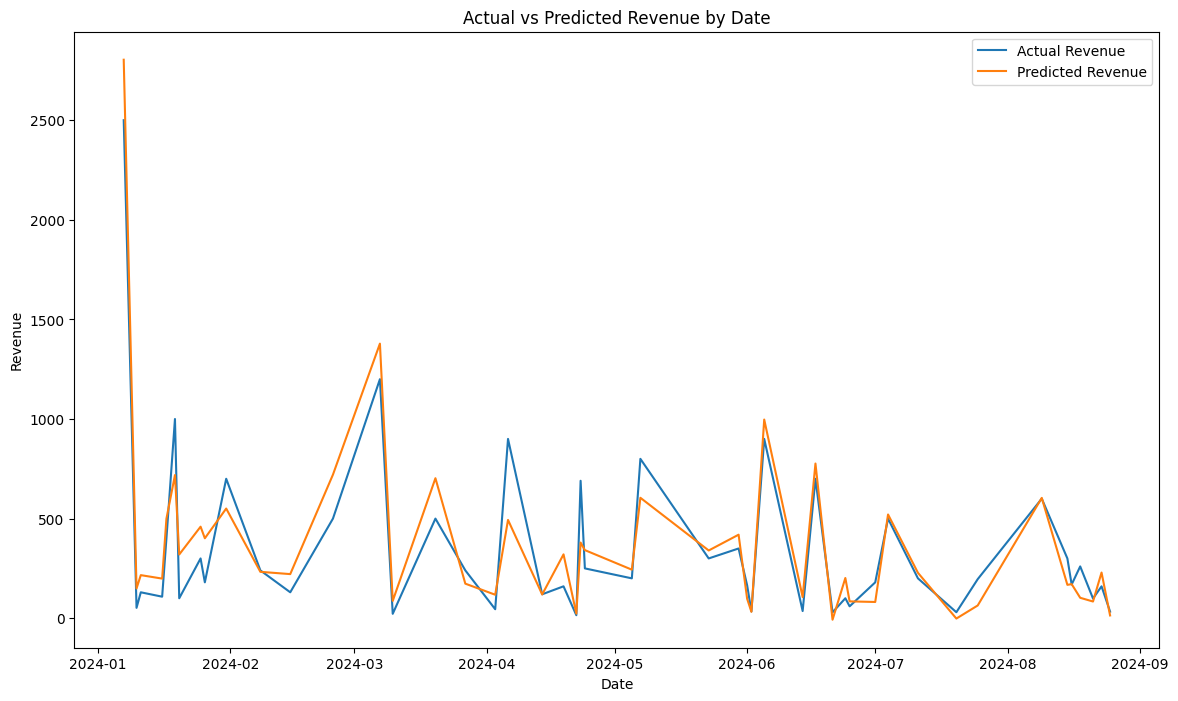

In [17]:
# Vẽ đồ thị so sánh doanh thu thực tế và dự đoán theo ngày
plt.figure(figsize=(14, 8))
plt.plot(daily_revenue['Date'], daily_revenue['Actual Revenue'], label='Actual Revenue')
plt.plot(daily_revenue['Date'], daily_revenue['Predicted Revenue'], label='Predicted Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Actual vs Predicted Revenue by Date')
plt.legend()
plt.show()

In [18]:
# Tính tổng doanh thu thực tế và dự đoán theo Region
region_revenue = X_test.groupby('Region').agg({'Actual Revenue': 'sum', 'Predicted Revenue': 'sum'}).reset_index()
region_revenue['Region Name'] = region_revenue['Region'].map(lambda x: label_encoders['Region'].inverse_transform([x])[0])

# Tính tổng doanh thu thực tế và dự đoán theo Product Category
category_revenue = X_test.groupby('Product Category').agg({'Actual Revenue': 'sum', 'Predicted Revenue': 'sum'}).reset_index()
category_revenue['Category Name'] = category_revenue['Product Category'].map(lambda x: label_encoders['Product Category'].inverse_transform([x])[0])


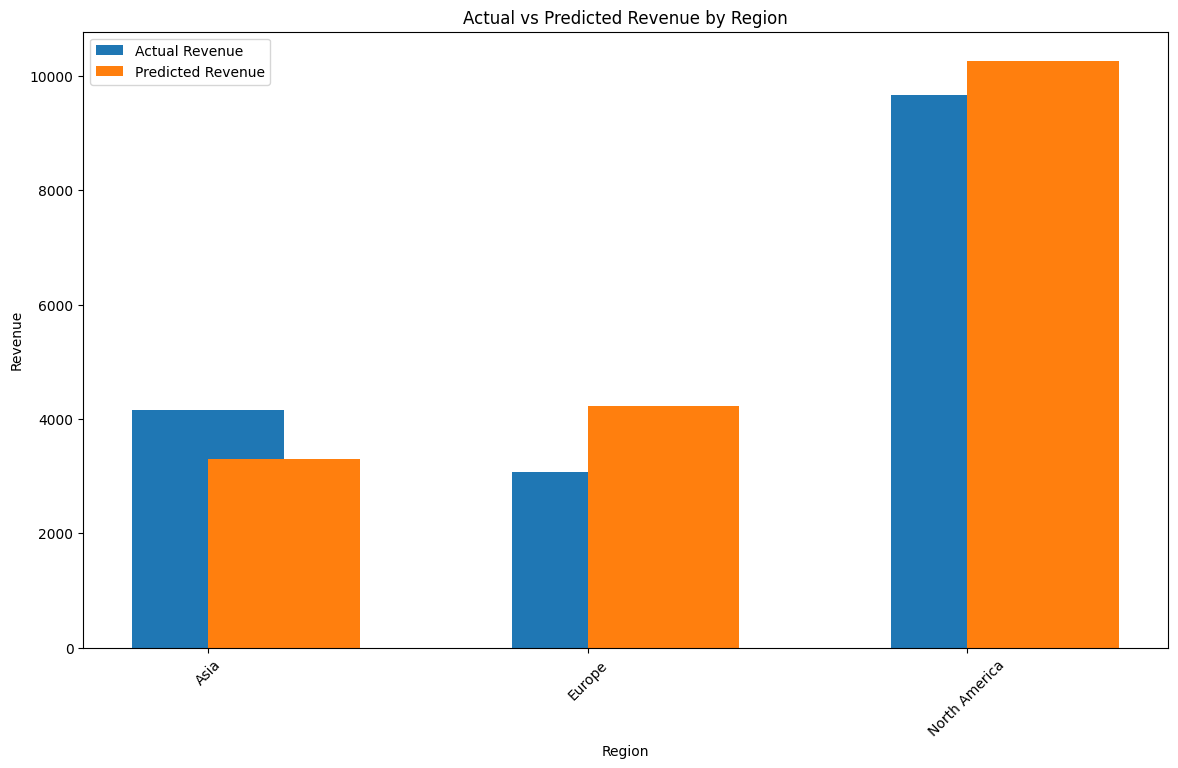

In [19]:
# Vẽ đồ thị so sánh doanh thu thực tế và dự đoán theo Region
plt.figure(figsize=(14, 8))
plt.bar(region_revenue['Region Name'], region_revenue['Actual Revenue'], width=0.4, label='Actual Revenue', align='center')
plt.bar(region_revenue['Region Name'], region_revenue['Predicted Revenue'], width=0.4, label='Predicted Revenue', align='edge')
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.title('Actual vs Predicted Revenue by Region')
plt.legend()
plt.xticks(rotation=45)
plt.show()

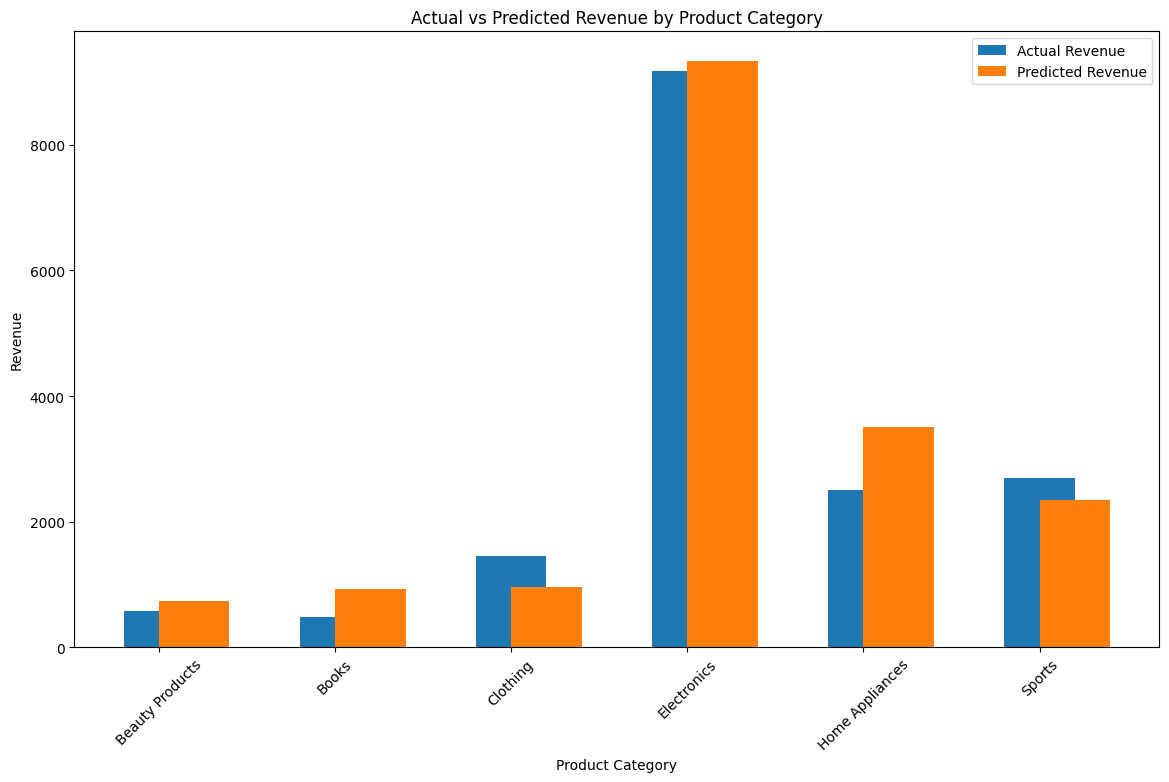

In [20]:
# Vẽ đồ thị so sánh doanh thu thực tế và dự đoán theo Product Category
plt.figure(figsize=(14, 8))
plt.bar(category_revenue['Category Name'], category_revenue['Actual Revenue'], width=0.4, label='Actual Revenue', align='center')
plt.bar(category_revenue['Category Name'], category_revenue['Predicted Revenue'], width=0.4, label='Predicted Revenue', align='edge')
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.title('Actual vs Predicted Revenue by Product Category')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [21]:
# Tính tổng doanh thu thực tế và dự đoán
total_actual_revenue = X_test['Actual Revenue'].sum()
total_predicted_revenue = X_test['Predicted Revenue'].sum()

# Hiển thị sự thay đổi doanh thu
revenue_change = total_predicted_revenue - total_actual_revenue
change_percentage = (revenue_change / total_actual_revenue) * 100

print(f'Total Actual Revenue: {total_actual_revenue}')
print(f'Total Predicted Revenue: {total_predicted_revenue}')
print(f'Revenue Change: {revenue_change}')
print(f'Change Percentage: {change_percentage:.2f}%')

Total Actual Revenue: 16881.940000000002
Total Predicted Revenue: 17785.88110821295
Revenue Change: 903.9411082129482
Change Percentage: 5.35%
